## 1) Delivery_time -> Predict delivery time using sorting time 

##### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [68]:
import pandas as pd 
data=pd.read_csv("D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Simple Linear Regrassion\\delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [69]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [71]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [72]:
#import sweetviz as sv
#sweet_report= sv.analyze(data)
#sweet_report.show_html('delivery_report.html')

In [73]:
#renames columns
data=data.rename({'Delivery Time':'delivery','Sorting Time':'sorting'},axis=1)

In [74]:
data.head()

,delivery,sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Standardize data 

In [75]:
'''from sklearn.preprocessing import StandardScaler
array= data.values
scaler=StandardScaler().fit(array)
rescaledX=scaler.transform(array)
#summarize transform data
from numpy import set_printoptions
set_printoptions(precision=2)
print(rescaledX[0:5,:])'''

'from sklearn.preprocessing import StandardScaler\narray= data.values\nscaler=StandardScaler().fit(array)\nrescaledX=scaler.transform(array)\n#summarize transform data\nfrom numpy import set_printoptions\nset_printoptions(precision=2)\nprint(rescaledX[0:5,:])'

## Normalize data 

In [76]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [77]:
array=data.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array)
#frameformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [78]:
arr=rescaledX
data=pd.DataFrame(arr,columns=['delivery','sorting'])
data.head()

,delivery,sorting
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


In [79]:
data.corr()

,delivery,sorting
delivery,1.000000,0.825997
sorting,0.825997,1.000000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery', ylabel='Density'>

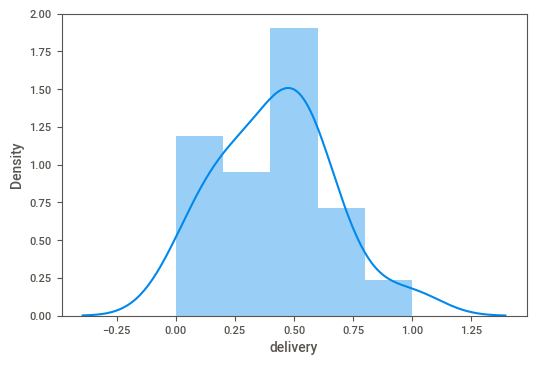

In [80]:
import seaborn as sns
sns.distplot(data['delivery'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting', ylabel='Density'>

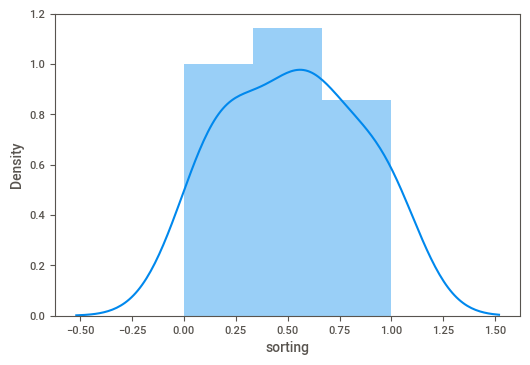

In [81]:
sns.distplot(data['sorting'])

In [82]:
import statsmodels.formula.api as smf
model=smf.ols('delivery~sorting',data=data).fit()

<AxesSubplot:xlabel='sorting', ylabel='delivery'>

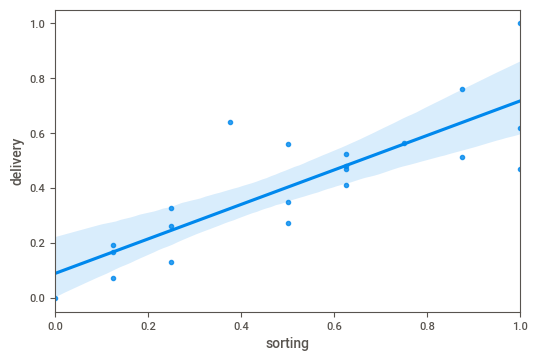

In [83]:
sns.regplot(x='sorting',y='delivery',data=data)

In [84]:
model.params # for values of  beta0 and beta1

Intercept    0.089561
sorting      0.628198
dtype: float64

In [85]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    1.496005
sorting      6.387447
dtype: float64 
 Intercept    0.151079
sorting      0.000004
dtype: float64


In [86]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        18:55:27   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0896      0.060      1.496      0.151      -0.036       0.215
sorting        0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predict for new data points

In [88]:
newdata=pd.Series([15,17,20])
pred_data=pd.DataFrame(newdata,columns=['sorting'])
model.predict(pred_data)

0     9.512531
1    10.768928
2    12.653522
dtype: float64

## 2) Salary_hike -> Build a prediction model for Salary_hike

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [90]:
import pandas as pd
data2=pd.read_csv("D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Simple Linear Regrassion\\Salary_Data.csv")
data2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [91]:
data2.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [92]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [93]:
data2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x181c2ab2910>,
 'caps': [<matplotlib.lines.Line2D at 0x181c2ab2fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x181c2ab25b0>],
 'medians': [<matplotlib.lines.Line2D at 0x181c27fb6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x181c27fba30>],
 'means': []}

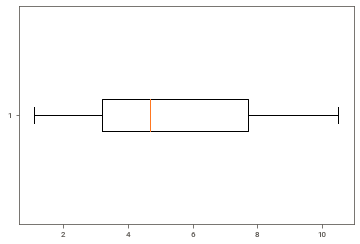

In [96]:
plt.boxplot(data2['YearsExperience'],vert=False)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

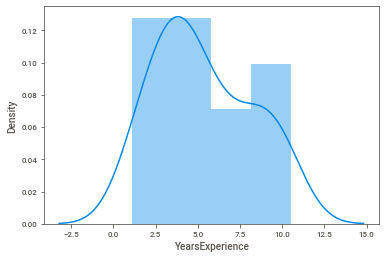

In [97]:
sns.distplot(data2['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x181c51d9f70>,
 'caps': [<matplotlib.lines.Line2D at 0x181c51be670>,
 'boxes': [<matplotlib.lines.Line2D at 0x181c51d9c10>],
 'medians': [<matplotlib.lines.Line2D at 0x181c51bed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x181c51a50d0>],
 'means': []}

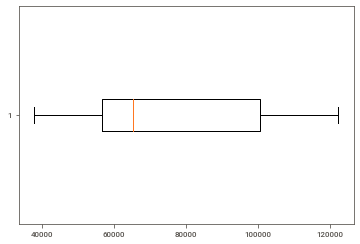

In [99]:
plt.boxplot(data2['Salary'],vert=False)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

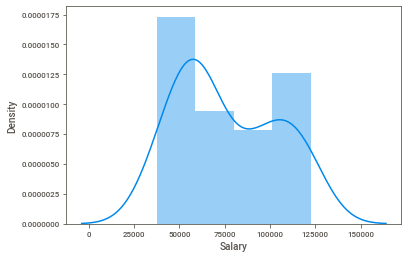

In [100]:
sns.distplot(data2['Salary'])

In [101]:
data2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [104]:
#renames of columns
data2=data2.rename({'YearsExperience':'exp','Salary':'salary'},axis=1)

In [105]:
data2.head()

,exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## We have to predict salary for given experience(user input)

In [107]:
import statsmodels.formula.api as smf
model=smf.ols('salary~exp',data=data2).fit()

<AxesSubplot:xlabel='exp', ylabel='salary'>

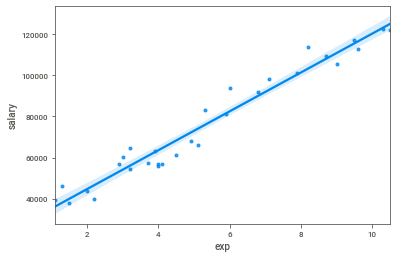

In [109]:
sns.regplot(x='exp',y='salary',data=data2)

In [111]:
model.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [112]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    11.346940
exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
exp          1.143068e-20
dtype: float64


In [113]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [114]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        19:16:16   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict for new data points

In [115]:
newdata=pd.Series([2.2,6.6,9.9])
pred_data=pd.DataFrame(newdata,columns=['exp'])
model.predict(pred_data)

0     46582.117306
1     88161.951520
2    119346.827181
dtype: float64